# Workshop Redes Neurais
## Grupo Turing

![Pytorch logo](https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png)

In [ ]:
!pip install torch

## 🔥 Básicos de Pytorch 🔥

Primeiro vamos ver alguns análogos entre **numpy** e **Pytorch**

### Matrizes
 - Em Pytorch, matrizes (*arrays*) são chamados de tensores.
 - Uma matriz $3\times3$, por exemplo é um tensor $3\times3$
 - Podemos criar um array numpy com o método `np.array()`
 - Podemos pegar o tipo do array com `type()`
 - Podemos pegar o formato do *array* com `np.shape()`. Linha $\times$ Coluna

In [ ]:
import numpy as np
import math

array = [[1,2,3],[4,5,6]]
primeiro_array = np.array(array) # array 2x3
print(f"Array do tipo: {type(primeiro_array)}")
print(f"Array de formato: {np.shape(primeiro_array)}")
print(primeiro_array)

- Criamos um tensor com o método `torch.Tensor()`
- `tensor.type`: tipo do *array*, nesse caso um tensor
- `tensor.shape`: formato do *array*. Linha $\times$ Coluna 

In [ ]:
import torch

tensor = torch.Tensor(array)
print(f"Array do tipo: {tensor.type}")
print(f"Array de formato: {tensor.shape}")
print(tensor)

Podemos fazer a alocação de *arrays* de maneira análoga nas duas linguagens:
 - `np.ones()` = `torch.ones()`
 - `np.random.rand()` = `torch.rand()`

In [ ]:
print(f"Numpy:\n {np.ones((2,3))}\n")

print(torch.ones((2,3)))

In [ ]:
print(f"Numpy:\n {np.random.rand(2,3)}\n")

print(torch.rand(2,3))

### Convertendo de numpy para torch e vice-versa

Em muitos pontos **numpy** e **pytorch** são bem parecidos em suas estruturas, e muitas das vezes podemos utilizar os dois em conjunto. Assim normalmente convertemos resultados de redes neurais - que são tensores - para **arrays** de **numpy**.

Os métodos para fazer a conversão entre tensores e arrays numpy:
 - `torch.from_numpy()`: de um array numpy para um tensor
 - `numpy()`: de um tensor para um array numpy

In [ ]:
array = np.random.rand(2,2)
print(f"{type(array)} \n {array} \n")

de_numpy_para_tensor = torch.from_numpy(array)
print(f"{de_numpy_para_tensor} \n")

tensor = de_numpy_para_tensor
de_tensor_para_numpy = tensor.numpy()
print(f"{type(de_tensor_para_numpy)} \n {de_tensor_para_numpy}")

Quando fazemos estas conversões também podemos fazer um *typecast* (mudança do tipo) das variáveis, isso pode ser útil já que o Pytorch faz uma série de computações de baixo nível, o qual o tipo primitivo das variáveis precisa ser bem especificado e definido, para isso podemos usar o método `tensor.type(torch.TipoDeTensor)`, alguns tipo de tensores nativos do Pytorch são:
  - `torch.FloatTensor` - pontos flutuantes de 32-bits
  - `torch.DoubleTensor` - pontos flutuantes de 64-bits
  - `torch.IntTensor` - números inteiros de 32-bits
  - `torch.LongTensor` - números inteiros de 64-bits
É muito comum encontrarmos *bugs* causados pela utilização errada de algum tipo primitivo, você pode ler sobre todos eles na [documentação do Pytorch](https://pytorch.org/docs/stable/tensors.html)


In [ ]:
array = np.array([[1,10],[2,20]])

# Transformar em um tensor de Floats:
tensor_float = torch.from_numpy(array).type(torch.FloatTensor)
print(f"{type(tensor_float)} \n {tensor_float}\n")

# Transformar em um tensor de Longs:
tensor_long = torch.from_numpy(array).type(torch.LongTensor)
print(f"{type(tensor_long)} \n {tensor_long}")

### Matemática básica com Pytorch
*considere a e b dois tensores*

- Redefinir o tamanho: `view()`
- Adição: `torch.add(a,b)` = a + b
- Subtração: `torch.sub(a,b)` = a - b
- Multiplicação elemento-a-elemento = `torch.mul(a,b)` = a * b
- Divisão elemento-a-elemento = `torch.div(a,b)` = a / b
- Média: `a.mean()`
- Desvio Padrão (Standart Deviantion - std): `a.std()`

In [ ]:
tensor = torch.ones(3,3)
print("\n", tensor, "\n")

print(f"{tensor.view(9).shape}: {tensor.view(9)} \n")

print(f"Adição: \n{torch.add(tensor, tensor)} \n")

print(f"Subtração: \n{torch.sub(tensor, tensor)} \n")

print(f"Multiplicação elemento-a-elemento: \n{torch.mul(tensor, tensor)} \n")

print(f"Divisão elemento-a-elemento: \n{torch.div(tensor, tensor)} \n")

tensor = torch.Tensor([1,2,3,4,5])
print(f"Média: {tensor.mean()} \n")

print(f"Desvio padrão: {tensor.std()} \n")

### Variáveis

- Acumulam os gradientes
- Na rede neural utilizaremos pytorch. Como explicamos anteriormente nas, redes neurais os gradientes são calculados na *backpropagation*.
- A diferença entre variáveis e tensores é a de que variáveis acumulam os gradientes
- Também podemos fazer operações matemáticas com variáveis
- Dessa maneira, se queremos fazer a *backpropagation* precisamos de variáveis

In [ ]:
from torch.autograd import Variable

var = Variable(torch.ones(3), requires_grad = True)
var

Vamos ver um exemplo de como as Variáveis são utilizadas em uma *backpropagation*, com duas função $f(y) = \sum y$, $y(x) = x^2$ e $x = (3,5)$


In [ ]:
array = [3,5]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(f" x = {x}")

f = sum(y)
print(f" f =  {f}")

f.backward() # Realiza as derivadas parciais

print(f"Gradientes: {x.grad}")

Vamos explicar passo a passo quais foram as operações feitas pelo Pytorch:
- Primeiro ele recebe os elementos do tensor e faz a primeira operação com eles $y_1 = 3^2 = 9$ e $y_2 = 5^2 = 25$
- Agora ele soma o tensor, retornando assim um único valor escalar: $\sum_i y_i = y_1 + y_2 = 9 + 25 = 34$
- O gradiente é a derivada parcial de cada elemento, ou seja o gradiente "1" é a derivada relativa à $y_1$ e o gradiente "2" é relativo à $y_2$ 
- derivada relativa à $y_1$ é $\frac{\partial}{\partial y_1}(3^2) = 2*3 = 6$
- derivada relativa à $y_2$ é $\frac{\partial}{\partial y_2}(5^2) = 2*5 = 10$
- Assim ficamos com os gradientes $(6, 10)$

## 🧠 Implementando uma rede neural 🧠
### Conhecendo e preparando nossos dados 

**[Fashion MNIST](https://www.kaggle.com/zalando-research/fashionmnist)** é uma coleção de diversas peças de roupas retiradas do serviço de *e-commerce* Zalando, ele consiste de cerca de 60.000 entradas de treino de 10.000 de teste. Cada entrada é uma imagem de 28x28 pixels em escala cinza. As peças de roupa estão classificadas da seguinte maneira:
  - 0 *T-shirt*
  - 1 *Trouser*
  - 2 *Pullover*
  - 3 *Dress*
  - 4 *Coat*
  - 5 *Sandal*
  - 6 *Shirt*
  - 7 *Sneaker*
  - 8 *Bag*
  - 9 *Ankle boot*

In [1]:
import pandas as pd

df_inicial = pd.read_csv("https://github.com/GrupoTuring/Workshop-de-redes-neurais/raw/main/fashion-mnist_train.csv")
df_inicial.head() # Como cada coluna representa o valor de cada pixel, a tabela dos dados não é muito "emocionante"

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
n_validos = 10000
n_treino = len(df_inicial) - n_validos
print(f"Número de entradas de treino: {n_treino}\n"
      f"Número de entradas de validação: {n_validos}")

Número de entradas de treino: 50000
Número de entradas de validação: 10000


In [3]:
# Usaremos essa função para dividir entre dados de treino e validação
def divide_valores(a,n):
     return a[:n].copy(), a[n:].copy()

In [4]:
# Dividir dataset entre dados x e labels y
y, x = df_inicial["label"].values, df_inicial.loc[:, df_inicial.columns != "label"].values

In [5]:
x_treino, x_valido = divide_valores(x, n_treino)
y_treino, y_valido = divide_valores(y, n_treino)

In [6]:
print(f"Formato do x de treino: {x_treino.shape}\n"
      f"Formato do x de validação: {x_valido.shape}\n"
      f"Formato do y de treino: {y_treino.shape}\n"
      f"Formato do y de validação: {y_valido.shape}")

Formato do x de treino: (50000, 784)
Formato do x de validação: (10000, 784)
Formato do y de treino: (50000,)
Formato do y de validação: (10000,)


Uma etapa comum de pré processamento de dados em aprendizado por máquina é centralizar padronizar nosso *dataset*, o que isso basicamente significa é que iremos subtrair a média de todo o *dataset* e dividi-lo pelo seu desvio padrão. Esse processo ajuda a agilizar o processo de aprendizado.

In [7]:
media = x_treino.mean()
desvio_padrao = x_treino.std()

x_treino = (x_treino-media)/desvio_padrao
print(f"Média antes do pré processamento: {media:.2f}\n"
      f"Desvio padrão antes do pré processamente: {desvio_padrao:.2f}\n"
      f"Média depois do pré processamento: {x_treino.mean():.2f}\n"
      f"Desvio padrão depois do pré processamento: {x_treino.std():.2f}")

Média antes do pré processamento: 72.86
Desvio padrão antes do pré processamente: 89.89
Média depois do pré processamento: -0.00
Desvio padrão depois do pré processamento: 1.00


In [8]:
# O mesmo deve ser feito com a validação

x_valido = (x_valido-media)/desvio_padrao
print(f"Média pós processamento: {x_valido.mean():.2f}\n"
      f"Desvio padrão pós processamento: {x_valido.std():.2f}")

Média pós processamento: 0.01
Desvio padrão pós processamento: 1.01


Vamos visualizar algumas das imagens de nosso *dataset*:

In [9]:
from matplotlib import pyplot as plt

# Essa função vai nos ajudar a visualizar as imagens
def mostrar(img, title=None):
    labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
    plt.imshow(img, cmap="gray")
    if title is not None: plt.title(labels[int(title)])

In [10]:
x_imgs = np.reshape(x_valido, (-1, 28, 28))

index = 100
mostrar(x_imgs[index], y_valido[index])

NameError: name 'np' is not defined

### Adaptando os dados para o Pytorch

In [11]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

In [12]:
# Transforme os respectivos datasets de numpy para tensores torch, 
# o tensor x_treino_torch deve ser do tipo torch.FloatTensor
# Dica, lembre-se da seção "Convertendo de numpy para torch e vice-versa"
x_treino_torch = torch.from_numpy(x_treino).type(torch.FloatTensor)
y_treino_torch = torch.from_numpy(y_treino)

x_valido_torch = torch.from_numpy(x_valido).type(torch.FloatTensor)
y_valido_torch = torch.from_numpy(y_valido)

tamanho_batch = 100
n_iters = 10000

n_epochs = int((n_iters / len(y_treino)) * tamanho_batch)

# Transformamos em um dataset de tensores
treino = torch.utils.data.TensorDataset(x_treino_torch, y_treino_torch)
validacao = torch.utils.data.TensorDataset(x_valido_torch, y_valido_torch)

# Preparamos o dataser para ser iterado pela rede
treino_loader = DataLoader(treino, batch_size=tamanho_batch, shuffle=True)
validacao_loader = DataLoader(validacao, batch_size=tamanho_batch, shuffle=True)

### Para que serviu o TensorDataset e o DataLoader?

Basicamente, o `TensorDataset` é uma abstração que prepara nossos dados para serem tratados como um dataset de tensores pelo o Pytorch, já o `DataLoader` é um iterador que nós ajuda a fazer alguns tratamentos bem útil em nosso dataset, como o batching e shuffle dele, em casos mais avançados ele também te possibilita trabalhar em como será feito o processamento desses dados pelo processador.

A estrutura do nosso loader pode ser resumida assim:
```
- 📦 500 batches de pares de tensores
  |- 🍱 100 Tensores de Imagens e 🗃️ 100 labels respectivas
     |- 🖼️ 1 imagem como tensor   |️-️️ 🏷️ 1 label da imagem
```

In [13]:
limite = 2
contador = 0
for i in treino_loader:
    if contador < limite: print(i)
    else: break
    contador += 1

[tensor([[-0.8106, -0.8106, -0.8106,  ..., -0.8106, -0.8106, -0.8106],
        [-0.8106, -0.8106, -0.8106,  ..., -0.8106, -0.8106, -0.8106],
        [-0.8106, -0.8106, -0.8106,  ..., -0.8106, -0.8106, -0.8106],
        ...,
        [-0.8106, -0.8106, -0.8106,  ..., -0.8106, -0.8106, -0.8106],
        [-0.8106, -0.8106, -0.8106,  ..., -0.8106, -0.8106, -0.8106],
        [-0.8106, -0.8106, -0.8106,  ..., -0.8106, -0.8106, -0.8106]]), tensor([7, 3, 9, 8, 6, 4, 8, 8, 2, 2, 2, 2, 8, 6, 4, 6, 3, 7, 2, 2, 7, 4, 8, 3,
        8, 5, 9, 7, 2, 4, 2, 6, 5, 5, 5, 3, 5, 2, 1, 5, 4, 8, 7, 1, 6, 7, 8, 9,
        3, 0, 6, 9, 7, 4, 8, 2, 0, 5, 1, 6, 0, 9, 0, 5, 2, 5, 4, 7, 1, 4, 4, 2,
        0, 0, 4, 9, 1, 1, 7, 2, 6, 2, 8, 4, 2, 6, 9, 5, 0, 1, 9, 4, 7, 4, 3, 2,
        5, 0, 9, 5])]
[tensor([[-0.8106, -0.8106, -0.8106,  ..., -0.8106, -0.8106, -0.8106],
        [-0.8106, -0.8106, -0.8106,  ..., -0.8106, -0.8106, -0.8106],
        [-0.8106, -0.8106, -0.8106,  ..., -0.8106, -0.8106, -0.8106],
        ...

In [ ]:
len(treino_loader)

Aqui podemos observar que nosso treino_loader é composto de 500 pares de tensores, vamos olhar melhor cada um desses tensores:

In [17]:
limite = 2
contador = 0
for i in treino_loader:
    if contador < limite:
        print(f"Tensor de imagens: {i[0]}\n"
            f"Tamanho do Tensor: {len(i[0])}\n"
            f"Formato do Tensor: {i[0].shape}\n"
            f"Imagem tensor: {i[0][0]}\n"
            f"Tamanho da imagem tensor: {len(i[0][0])}\n"
            f"------------------------------------------")
    else: break


        -8.1057e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01,
        -8.1057e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01,
        -8.1057e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01,
        -7.6345e-02,  5.9113e-01,  4.9101e-01,  3.7976e-01,  4.1314e-01,
         4.1314e-01,  4.1314e-01,  3.7976e-01,  3.3527e-01,  3.5752e-01,
         2.5739e-01,  7.9399e-02,  1.3502e-01, -8.1057e-01, -8.1057e-01,
        -8.1057e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01,
        -8.1057e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01,
        -8.1057e-01, -8.1057e-01, -8.1057e-01, -2.0722e-02,  6.3563e-01,
         4.3539e-01,  4.3539e-01,  4.1314e-01,  4.3539e-01,  4.1314e-01,
         3.7976e-01,  3.5752e-01,  3.5752e-01,  3.5752e-01,  7.9399e-02,
         1.5727e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01,
        -8.1057e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01,
        -8.1057e-01, -8.1057e-01, -8.1057e-01, -8.

Aqui pode-se notar que o primeiro tensor do par é um tensor em que cada elemento é um batch de 100 imagens-tensor. Vamos olhar o segundo elemento do par:

In [ ]:
limite = 2
contador = 0
for i in treino_loader:
    if contador < limite:
        print(f"Tensor de labels: {i[1]}\n"
            f"Tamanho do Tensor: {len(i[1])}\n"
            f"Label: {i[1][0]}\n"
            f"------------------------------------------")
    else: break

Aqui pode-se notar que o segundo tensor do par é um tensor em que cada elemento é um batch de 100 classificações.

### Fazendo para uma Rede Neural

**Por que adicionar mais camadas?** Podemos pensar em cada camada como um nível de abstração, no nosso exemplo podemos pensar na camada de entrada como a a imagem, o primeiro *hidden layer* como algo que detecta bordas na imagem e o segundo *hidden layer* como  algo que detecta formas e padrões, e o nossa camada de saída, o estilo da roupa. Basicamente quando aumentamos o número de camadas aumentamos o número parâmetros no nosso modelo, assim podendo treinar funções mais complexas.

**A função de ativação retificadora linear** (*Rectified Linear Activation Function*) - ReL 

Para conseguirmos passar um sinal para a próxima camada, necessitamos de funções de ativação. Duas funções comuns são as [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) e [tangente hiperbólica](https://mathworld.wolfram.com/HyperbolicTangent.html), ambas funções não lineares, uma propriedade que ajuda nosso modelo a compreender funções mais complexas. Porém, como elas são funções com limites bem estabelecidos, elas acabam "saturando" suas saídas, sendo sensíveis apenas para seus valores intermediários. A solução é utilizar a função de ativação retificadora linear (ReL) nos *hidden layers*. Dizemos que um nó (ou neurônio) com essa função de ativação é uma unidade de ativação retificadora linear (ReLU)

$$
f(x) = \begin{cases}
    x & \text{if } x > 0, \\
    0 & \text{caso contrário}.
\end{cases}
$$

![Funções de Ativação](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F1200%2F1*ZafDv3VUm60Eh10OeJu1vw.png&f=1&nofb=1)

**O que é a função nn.Sequential() do torch?** Ele é uma espécie de container que cria nosso modelo, onde cada camada é colocada na ordem que definimos dentro da função. Não é necessário sempre utilizar essa função para criar um modelo em torch, mas ela simplifica um pouco nosso trabalho.

In [14]:
class RedeNeural(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(RedeNeural, self).__init__()

        self.layers = nn.Sequential(        # Inicie a função nn.Sequential()
            nn.Linear(input_dim, 128),      # Primeira camada com nn.Linear(input_dim, 32)
            nn.ReLU(),                      # Colocar a unidade de ativação nn.ReLU()
            nn.Linear(128, 128),            # Segunda camada com nn.Linear(32, 32)
            nn.ReLU(),                      # Colcoar a unidade de ativação ReLU
            nn.Linear(128, output_dim),     # Última camada nn.Linear(32, output_dim)
            nn.LogSoftmax()                 # Última camada de ativação nn.LogSoftmax
        )

    def forward(self, x):
        y = self.layers(x)                  # Faça a forward propagation como na regressão logística
        return y

# Defina as dimensões de entrada e saída
input_dim = 28*28 
output_dim = 10

# Função de perda (loss)
erro_nn = nn.NLLLoss()

# Incialize o modelo
modelo_nn = RedeNeural(input_dim, output_dim)

# Otimizador SGD
learning_rate = 0.02
otimizador_nn = torch.optim.SGD(modelo_nn.parameters(), lr = learning_rate)

In [15]:
contagem = 0
lista_loss = []
lista_iteracao = []
for epoch in range(n_epochs):
    for imagens, classificacao in treino_loader:
        
        # Utilizando a função Variable() crie as seguintes variáveis:
        treino = Variable(imagens.view(100, 28*28)) # Crie uma variável com as imagens, porém, mude a forma do tensor
                                                    # para ([100,28*28]) com o método .view(), ao invés de 100, vc
                                                    # pode escrever `-1`, que o pytorch pega a dimensão para vc.
        
        validacao = Variable(classificacao)     # Cire uma variável com a classificacao

        # Limpamos os gradientes
        otimizador_nn.zero_grad()

        # Utilize o método .forward() do modelo utilizando a variável de treino
        # para realizarmos a forward propagation
        outputs = modelo_nn(treino) 

        # Utilize a função de perda erro() com nosso output e a variável de verificação
        loss_nn = erro_nn(outputs, validacao)

        # Realizamos a backward propagation
        loss_nn.backward()

        # Atualiza os parâmetros
        otimizador_nn.step() 

        contagem += 1

        # Predições
        if contagem % 50 == 0:
            # Calculamos a acurácia
            corretos = 0
            total = 0

            for imagens, classificacao in treino_loader:
                
                # Crie uma variável com as imagens da mesma maneira como na variável de treino
                teste = Variable(imagens.view(-1, 28*28))

                # Forward propagation
                outputs = modelo_nn(teste)
                
                # Recebe as predições do valor máximo
                predito =  torch.max(outputs.data, 1)[1]

                # Número total de classificações
                total += len(classificacao)

                # Número de predições corretas
                corretos += (predito == classificacao).sum()

            acuracia = 100 * corretos / float(total)

            # Armazena a loss e iteração
            lista_loss.append(loss_nn.data)
            lista_iteracao.append(contagem)

        if contagem % 500 == 0:
            # Printa a loss
            print(f"Iteração: {contagem} | Loss: {loss_nn.data} | Acurácia: {acuracia}")

/home/nelson/anaconda3/envs/torch/lib/python3.8/site-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
Iteração: 500 | Loss: 0.6836502552032471 | Acurácia: 80.49199676513672
Iteração: 1000 | Loss: 0.4677325487136841 | Acurácia: 83.53199768066406
Iteração: 1500 | Loss: 0.40055692195892334 | Acurácia: 84.63999938964844
Iteração: 2000 | Loss: 0.4596629738807678 | Acurácia: 85.40799713134766
Iteração: 2500 | Loss: 0.43240001797676086 | Acurácia: 86.45600128173828
Iteração: 3000 | Loss: 0.21666601300239563 | Acurácia: 86.86599731445312
Iteração: 3500 | Loss: 0.3180296719074249 | Acurácia: 87.00599670410156
Iteração: 4000 | Loss: 0.4094001352787018 | Acurácia: 87.64199829101562
Iteração: 4500 | Loss: 0.26641350984573364 | Acurácia: 88.31800079345703
Iteração: 5000 | Loss: 0.17777837812900543 | Acurácia: 88.75199890136719
Iteração: 5500 | Loss: 0.45703

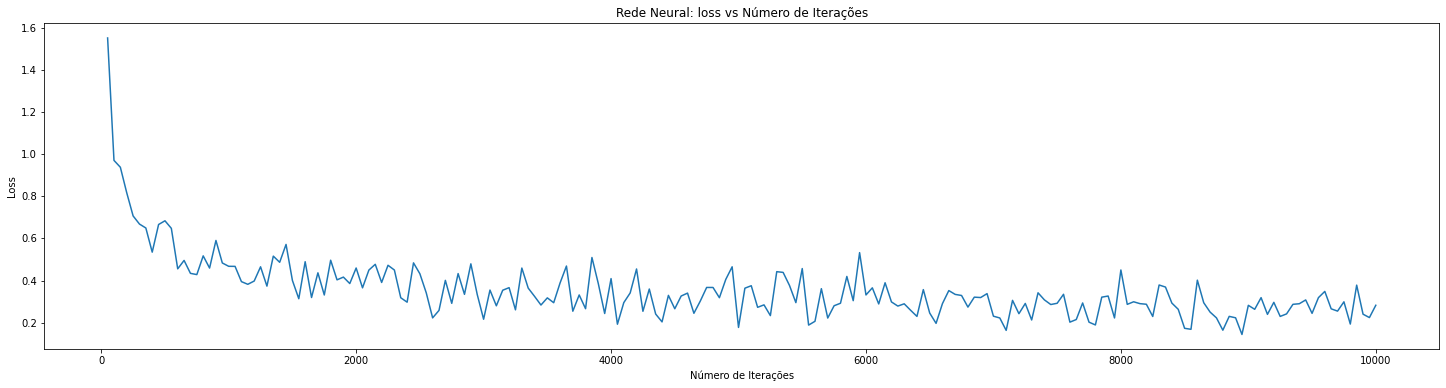

In [18]:
plt.figure(figsize=(25,6))
plt.plot(lista_iteracao,lista_loss)
plt.xlabel("Número de Iterações")
plt.ylabel("Loss")
plt.title("Rede Neural: loss vs Número de Iterações")
plt.show()

## 🏠 Para casa! 🏠

### Exercícios de PyTorch Básico

Coplete às células de código abaixo no campo indicado por "...":

Crie um tensor com base no *array* dado:

In [ ]:
array = [[10,100,1000], [20,200,2000]]
tensor = torch.Tensor(array)
tensor

Crie um tensor de formato $(5,3)$ no qual todos os elementos são o número 1, depois utilize o método `.shape` para verificar seu formato:

In [ ]:
tensor_de_uns = torch.ones(5,3)
formato_do_tensor = tensor_de_uns.shape

print(f"Tensor: \n {tensor_de_uns}")
print(f"Formato: {formato_do_tensor}")

Converta o *array* numpy para um tensor de Pytorch, depois transforme o tensor em um *array* numpy novamente.

In [ ]:
array = np.array([[1,1,2,3], [5,8,13,21]])

de_numpy_para_tensor = torch.from_numpy(array)
print(f"{de_numpy_para_tensor} \n É um tensor? {isinstance(de_numpy_para_tensor, torch.Tensor)}")

de_tensor_para_numpy = de_numpy_para_tensor.numpy()
print(f"{de_tensor_para_numpy} \n É um array numpy? {isinstance(de_tensor_para_numpy, np.ndarray)}")

Complete a célula abaixo com as operações indicadas:

In [ ]:
tensor_a = torch.Tensor([[5,8],[5,4]])
tensor_b = torch.Tensor([[10,16],[10,8]])

soma = torch.add(tensor_a,tensor_b) # a+b
subtracao = torch.sub(tensor_b, tensor_a) # b-a
mul = torch.mul(tensor_a, tensor_b) # a*b
div = torch.div(tensor_b, tensor_a) # b/a
media = tensor_a.mean() # media de a
std = tensor_b.std() # desvio padrão de b

print(f"Soma:\n {soma} \n"
      f"Subtração:\n {subtracao} \n"
      f"Multiplicação:\n {mul} \n"
      f"Divisão:\n {div} \n"
      f"Média: {media} \n"
      f"Desvio Padrão: {std} \n")

Crie uma **Varíavel** do Pytorch com o tensor definido. Depois defina as equações $y = log_e(x)$ e $f(y) = 2*media(y)$. Para então aplicar a *backpropagation* em $f(x)$ e calcular seus gradientes.

In [ ]:
array = [4,5]
tensor = torch.Tensor(array)

x = Variable(tensor, requires_grad=True)
print(f" x = {x}")

y = torch.log(x) # Dica: use o operador torch.log()
print(f" y = {y}")

f = 2 * y.mean()
print(f" f = {f}")

# Escreva aqui a backpropagation de f
f.backward()

if isinstance(x, torch.Tensor): print(f"Gradientes: {x.grad}")
else: print("Complete o exerćicio!")

### Criando uma regressão logística

Dizemos que uma regressão linear é basicamente uma maneira de visualizar nossos dados em uma "linha" e que a partir dessa linha podemos fazer algumas predições sobre dados futuros.

Porém, regressões lineares não são muito boas com classificações, para isso utilizaremos uma regressão logística.

Uma regressão logística é uma regressão linear que utiliza a função **softmax** como uma **função de ativação**:
$$
a_i = \frac{e^{x+i}}{\sum_{j=1}^n e^{x_j}}
$$

> **Obs:** O que a função **softmax** basicamente faz é receber um vetor (lista) de valores numéricos e os transforma em valores probabilísticos. Em outras palavras, quanto maior for o valor da preferência daquela patâmetro, depois que essa lista de valores passar pela função Softmax, maior será sua probabilidade.

Dizemos que uma regressão logística é basicamente uma rede neural bem simples:

![Diagrama de uma regressão logística](https://i.imgur.com/IfybNNw.png)

In [ ]:
class RegressaoLogistica(nn.Module):
    def __init__ (self, input_dim, output_dim):
        super(RegressaoLogistica, self).__init__()  # Já que será "filho" de nn.Module, temos que iniciar seu "pai"

        self.linear = nn.Sequential(
            nn.Linear(input_dim, output_dim), # Parte linear
            nn.LogSoftmax()                   # A parte logística
        )

    def forward(self, x):
        y = self.linear(x)
        return y

erro = nn.NLLLoss() # Função de perda (loss)

input_dim = 28*28 # Dica, olhe na especificação do problema
output_dim = 10

# Inicialize a Regressão Logística com as dimensões de input e output estabelecidas
modelo = RegressaoLogistica(input_dim, output_dim) 

# Aqui escolhemos nosso otimizador, que nesse caso será o Stochastic gradient descent, 
# que estará otimizando os parâmetros de nossa regrssão linear.
taxa_aprendizado = 0.001
otimizador = torch.optim.SGD(modelo.parameters(), lr=taxa_aprendizado)

### Vamos agora treinar nosso modelo:

In [ ]:
contagem = 0
lista_loss = []
lista_iteracao = []
for epoch in range(n_epochs):
    for imagens, classificacao in treino_loader:
        
        # Utilizando a função Variable() crie as seguintes variáveis:
        treino = Variable(imagens.view(-1, 28*28)) # Crie uma variável com as imagens, porém, mude a forma do tensor
                                                   # para (-1,28*28) com o método .view()
        
        validacao = Variable(classificacao)     # Cire uma variável com a classificacao

        # Limpamos os gradientes
        otimizador.zero_grad()

        # Utilize o método .forward() do modelo utilizando a variável de treino
        # para realizarmos a forward propagation
        outputs = modelo(treino) 

        # Utilize a função de perda erro() com nosso output e a variável de verificação
        loss = erro(outputs, validacao)

        # Realizamos a backward propagation
        loss.backward()

        # Atualiza os parâmetros
        otimizador.step() 

        contagem += 1

        # Predições
        if contagem % 50 == 0:
            # Calculamos a acurácia
            corretos = 0
            total = 0

            for imagens, classificacao in treino_loader:
                
                # Crie uma variável com as imagens da mesma maneira como na variável de treino
                teste = Variable(imagens.view(-1, 28*28))

                # Forward propagation
                outputs = modelo(teste)
                
                # Recebe as predições do valor máximo
                predito =  torch.max(outputs.data, 1)[1]

                # Número total de classificações
                total += len(classificacao)

                # Número de predições corretas
                corretos += (predito == classificacao).sum()

            acuracia = 100 * corretos / float(total)

            # Armazena a loss e iteração
            lista_loss.append(loss.data)
            lista_iteracao.append(contagem)

        if contagem % 500 == 0:
            # Printa a loss
            print(f"Iteração: {contagem} | Loss: {loss.data} | Acurácia: {acuracia}")

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(lista_iteracao,lista_loss)
plt.xlabel("Número de Iterações")
plt.ylabel("Loss")
plt.title("Regressão Logística: Loss vs Número de Iterações")
plt.show()

Ficou com alguma dúvida? Entre no nosso [Discord](https://discord.gg/26RGmBS) e tentaremos te ajudar!

## E agora? Ficou querendo mais? Você pode

  - 👀 Checar essa [playlist](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) do canal 3Blue 1Brown sobre o assunto e rever seus conhecimentos.
  - 📚 Olhar a documentação do [PyTorch](https://pytorch.org/docs/stable/index.html).
  - 🏋️️ ️Explorar e tentar aplicar seu conhecimento em outros datasets, vocẽ pode tentar procurar por projetos no [Kaggle](https://www.kaggle.com/). Recomendamos o [MNIST original](https://www.kaggle.com/c/digit-recognizer) e o [Sign Language MNIST](https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000).